In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
arr = np.load('X.npy')

In [3]:
arr.shape

(70578, 1024)

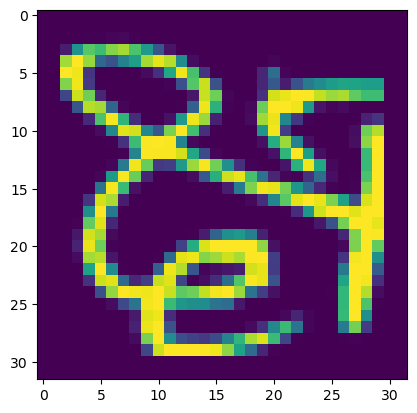

In [4]:
plt.imshow(arr[450].reshape(32,32))

In [5]:
y = np.load('Y.npy')

In [6]:
y.shape

(70578,)

In [7]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
clf.fit(arr,y)

RidgeClassifier()

In [8]:
y_pred = clf.predict(arr)

In [9]:
from sklearn.metrics import classification_report, f1_score

f1_score(y_pred, y,average='micro')

0.6103318314488935

In [11]:
import torch
from torch import nn
import torch.nn.functional as F

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
X = arr/255.0

In [8]:
Y = y

In [9]:
Y.shape, X.shape

((70578,), (70578, 1024))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 32, 32), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

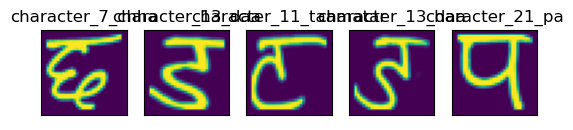

In [13]:
plot_example(X_train, y_train)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
clf = RandomForestClassifier()
#clf = KNeighborsClassifier(n_neighbors = 6)
#clf = LogisticRegression()
#clf = BernoulliNB()
#clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [64]:
f1_score(y_pred, y_test, average='weighted' ), f1_score(y_pred, y_test, average='micro' ),f1_score(y_pred, y_test, average='macro' )

(0.8925843561213566, 0.8924341173136866, 0.8919617919448789)

In [65]:
from sklearn.metrics import classification_report, f1_score
y_pred = clf.predict(X_test)

target_names = [ '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36']
classification_report(y_pred,y_test,target_names=target_names)
#print(f1_score(y_pred, y_test ,average='micro'))

'              precision    recall  f1-score   support\n\n           1       0.91      0.93      0.92       507\n           2       0.95      0.92      0.94       426\n           3       0.93      0.91      0.92       516\n           4       0.89      0.87      0.88       420\n           5       0.95      0.91      0.93       515\n           6       0.93      0.89      0.91       527\n           7       0.96      0.94      0.95       513\n           8       0.85      0.87      0.86       477\n           9       0.85      0.86      0.86       408\n          10       0.85      0.88      0.87       491\n          11       0.93      0.92      0.92       488\n          12       0.92      0.85      0.88       551\n          13       0.92      0.80      0.86       610\n          14       0.95      0.88      0.91       480\n          15       0.79      0.91      0.85       427\n          16       0.88      0.92      0.90       483\n          17       0.83      0.88      0.85       477\n       

In [67]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=300).fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
#clf = RandomForestClassifier()
clf = KNeighborsClassifier(n_neighbors = 3)
#clf = LogisticRegression()
#clf = BernoulliNB()
#clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [76]:
f1_score(y_pred, y_test, average='weighted' ), f1_score(y_pred, y_test, average='micro' ),f1_score(y_pred, y_test, average='macro' )


(0.8914043989365603, 0.8930008500991783, 0.8939090974845807)